In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#C:\Users\2bogu\Desktop\Sringboard_Materials\20.3 Story Telling\archive\

# 20.3 Storyteling: Exploring the effects of the Financial Revolution in England through GDP

- The Financial Revolution (FR) is considered to be the dawn of the modern age, enabling the success of the American Revolution, the english empire, and the industrial revolution. Eventualy leading to the wide spread adoption of financial institutions in Europe and the rest of the world.
- H: There is a measurable impact on gdp from the FR
- Hnull: The FR had no measureable impact
- Financial Revolution technically begain in 1688
- Bank of England was established July 1694
- Civil List passed in 1698 altering balence of power between parliment and crown
- We will use 1700 as cutoff between pre and post financial revolution
- Using A Millennium of Macroeconomic Data found on Kaggle
- 

In [3]:
df = pd.read_excel('millenniumofdata_v3_final.xlsx',
                   sheet_name='A21. GDP per capita 1086+',
                   index_col=0,
                   header=None,
                   names=['year', 'nom_gdp', 'real_gdp', 'pop', 'nom_gdp_percap', 'real_gdp_percap', 'gdp_deflator'],
                   skiprows=189,
                   usecols='A,B,E,G,H,I,J')#

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 1270 to 2016
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_gdp          747 non-null    float64
 1   real_gdp         747 non-null    float64
 2   pop              747 non-null    float64
 3   nom_gdp_percap   747 non-null    float64
 4   real_gdp_percap  747 non-null    float64
 5   gdp_deflator     747 non-null    float64
dtypes: float64(6)
memory usage: 40.9 KB


In [5]:
df.head()

,nom_gdp,real_gdp,pop,nom_gdp_percap,real_gdp_percap,gdp_deflator
year,,,,,,
1270,4.421102,3517.775650,4.364903,1.012875,805.922956,0.125679
1271,4.766962,3481.222223,4.371751,1.090401,796.299377,0.136934
1272,4.938445,3611.892126,4.378609,1.127857,824.894942,0.136727
1273,4.401956,3406.873983,4.385478,1.003757,776.853595,0.129208
1274,4.666754,3394.209720,4.392357,1.062471,772.753576,0.137492


In [6]:
df = df.round(decimals=2)

In [7]:
df.describe()

,nom_gdp,real_gdp,pop,nom_gdp_percap,real_gdp_percap,gdp_deflator
count,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000
mean,4.555926e+04,1.021699e+05,11.814458,910.964485,3261.986011,4.450428
std,2.123483e+05,2.685487e+05,14.454547,4110.569994,5106.893395,16.153488
min,2.750000e+00,1.901170e+03,1.900000,0.770000,673.110000,0.110000
25%,4.760000e+00,3.065215e+03,2.750000,1.875000,1085.055000,0.170000
50%,3.857000e+01,5.742510e+03,5.090000,7.420000,1246.590000,0.670000
75%,3.804750e+02,3.157322e+04,12.985000,30.600000,2461.480000,1.020000
max,1.666863e+06,1.600372e+06,55.220000,30186.400000,28982.270000,104.150000


In [8]:
df

,nom_gdp,real_gdp,pop,nom_gdp_percap,real_gdp_percap,gdp_deflator
year,,,,,,
1270,4.42,3517.78,4.36,1.01,805.92,0.13
1271,4.77,3481.22,4.37,1.09,796.30,0.14
1272,4.94,3611.89,4.38,1.13,824.89,0.14
1273,4.40,3406.87,4.39,1.00,776.85,0.13
1274,4.67,3394.21,4.39,1.06,772.75,0.14
...,...,...,...,...,...,...
2012,1427603.69,1455375.42,53.49,26687.31,27206.47,98.09
2013,1483697.33,1483697.33,53.87,27544.32,27544.32,100.00
2014,1561674.02,1534813.81,54.32,28751.31,28256.80,101.75


In [12]:
df_ = df.loc[1500:1899]

In [13]:
from sklearn.preprocessing import MinMaxScaler

df_m = pd.DataFrame(MinMaxScaler().fit_transform(df_),
                    columns=['nom_gdp', 'real_gdp', 'pop', 'nom_gdp_percap', 'real_gdp_percap', 'gdp_deflator'])

In [14]:
df_m = df_m.set_index(df_.index)

In [15]:
sns.set_theme(style='darkgrid')

Text(0.5, 1.0, 'normalized english economic data over time')

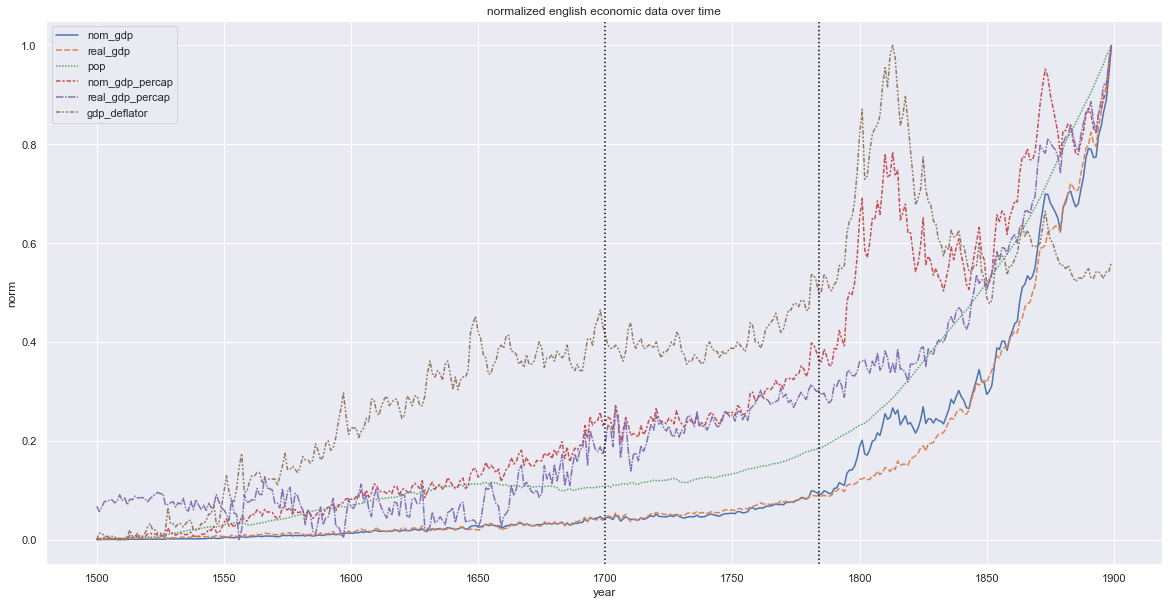

In [47]:
plt.figure(figsize=[20,10])
sns.lineplot(data=df_m) 
plt.axvline(x=1700, color='black', linestyle=':')
plt.axvline(x=1784, color='black', linestyle=':')
plt.ylabel('norm')
plt.title('normalized english economic data over time')

Text(0.5, 1.0, 'normalized english gdp over time')

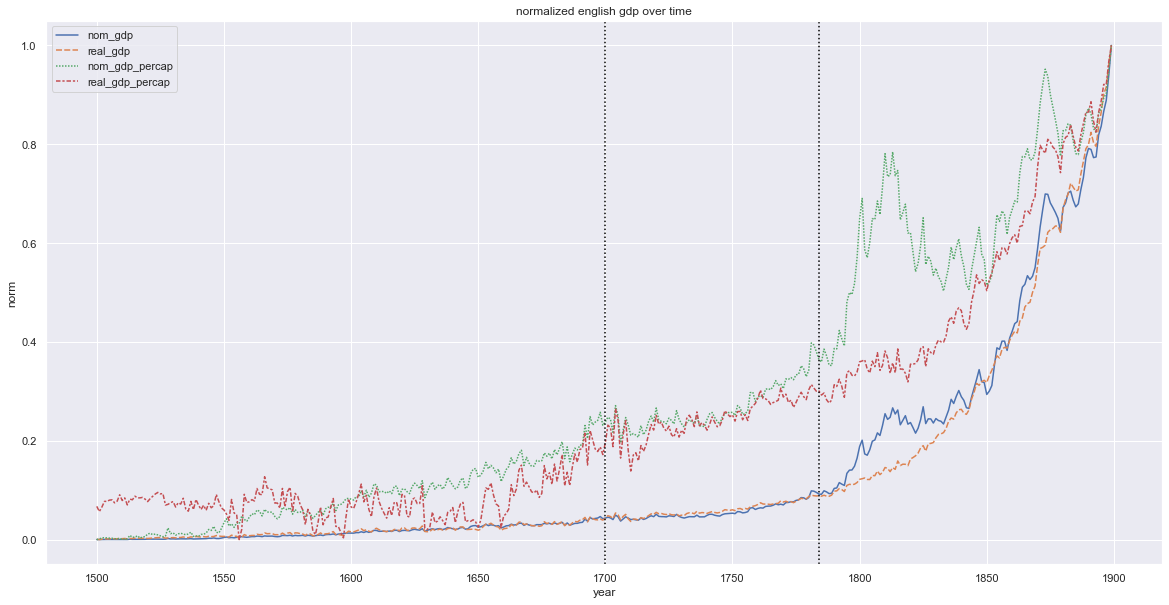

In [48]:
plt.figure(figsize=[20,10])
sns.lineplot(data=df_m.drop(['pop', 'gdp_deflator'],axis=1))
plt.axvline(x=1700, color='black', linestyle=':')
plt.axvline(x=1784, color='black', linestyle=':')
plt.ylabel('norm')
plt.title('normalized english gdp over time')

In [18]:
df_gr = df_.pct_change() * 100

Text(0.5, 1.0, 'pct change of english nominal gdp over time')

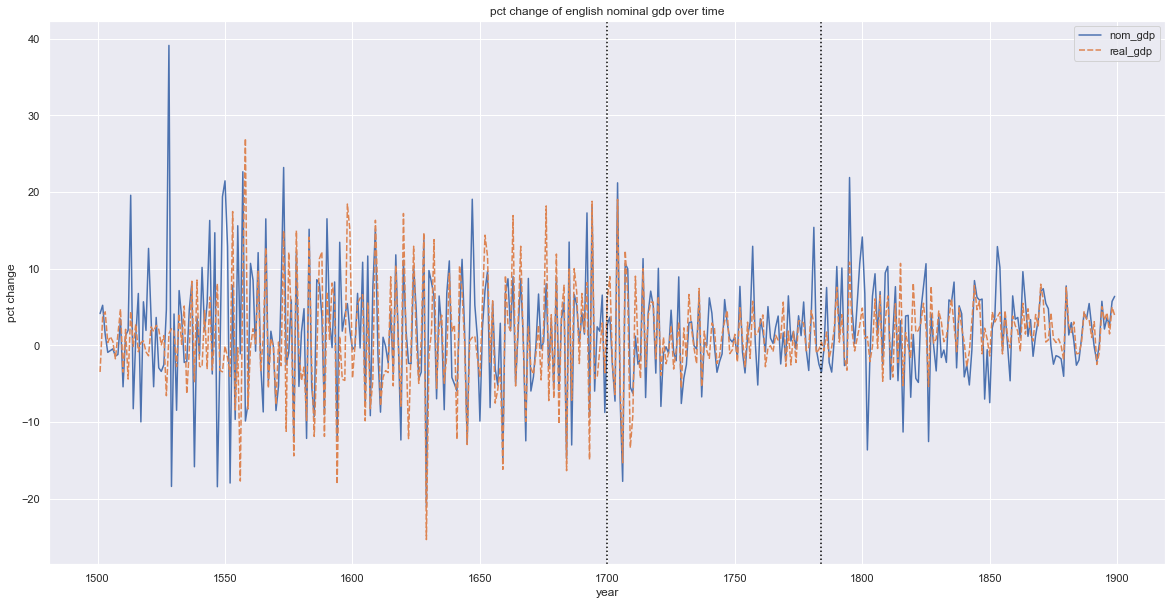

In [49]:
plt.figure(figsize=[20,10])
sns.lineplot(data=df_gr.loc[:,('nom_gdp','real_gdp')]) 
plt.axvline(x=1700, color='black', linestyle=':')
plt.axvline(x=1784, color='black', linestyle=':')
plt.ylabel('pct change')
plt.title('pct change of english nominal gdp over time')

Text(0.5, 1.0, 'pct change of english real gdp over time')

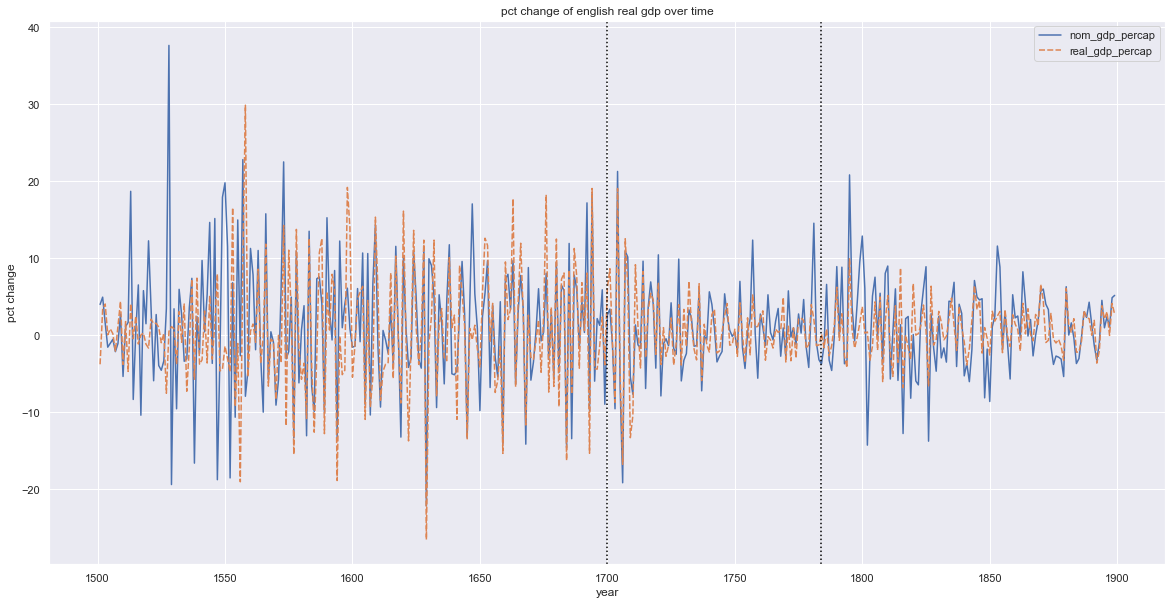

In [50]:
plt.figure(figsize=[20,10])
sns.lineplot(data=df_gr.loc[:,('nom_gdp_percap','real_gdp_percap')]) 
plt.axvline(x=1700, color='black', linestyle=':')
plt.axvline(x=1784, color='black', linestyle=':')
plt.ylabel('pct change')
plt.title('pct change of english real gdp over time')

C:\Users\2bogu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'pct change of english gdp over time')

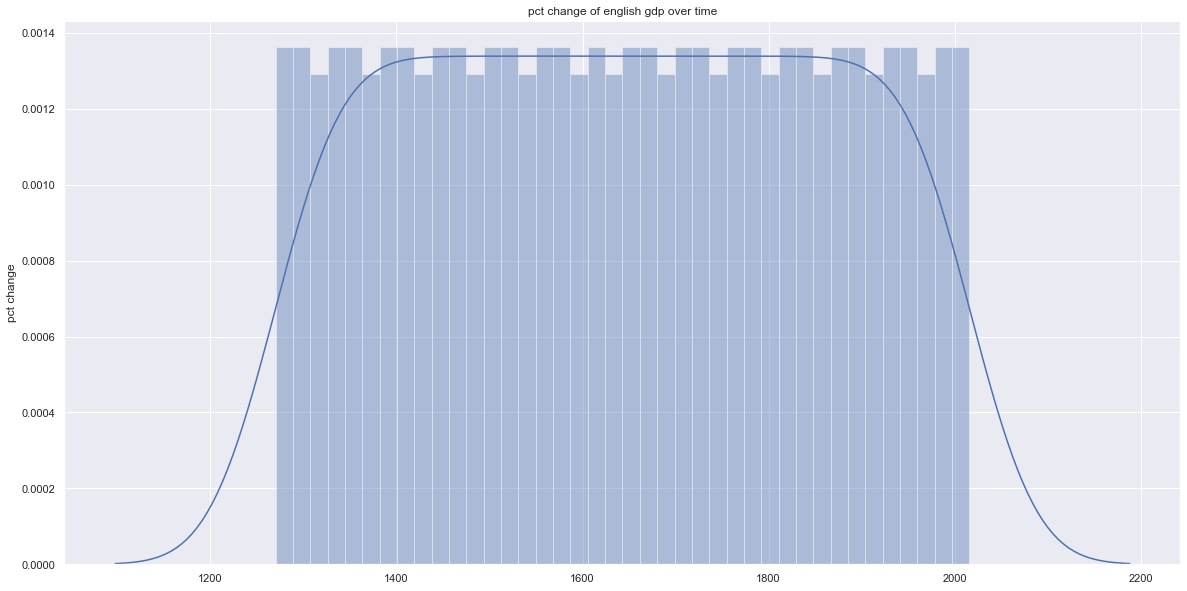

In [44]:
plt.figure(figsize=[20,10])
sns.distplot(df_gr.drop(['pop', 'gdp_deflator'],axis=1),x=df.index,bins=40)
plt.ylabel('pct change')
plt.title('pct change of english gdp over time')

In [22]:
fr = df_.reset_index().loc[:,'year'].apply(lambda x: 'pre' if x < 1700 else 'post').values
df_.loc[:,'fr'] = fr

C:\Users\2bogu\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\2bogu\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [23]:
df_

,nom_gdp,real_gdp,pop,nom_gdp_percap,real_gdp_percap,gdp_deflator,fr
year,,,,,,,
1500,3.87,2529.64,2.20,1.75,1147.93,0.15,pre
1501,4.03,2441.49,2.21,1.82,1104.69,0.17,pre
1502,4.24,2531.39,2.22,1.91,1142.03,0.17,pre
1503,4.30,2641.79,2.22,1.94,1188.36,0.16,pre
1504,4.26,2650.97,2.23,1.91,1189.00,0.16,pre
...,...,...,...,...,...,...,...
1895,1251.57,127646.58,28.58,43.79,4465.92,0.98,post
1896,1296.56,133058.37,28.91,44.85,4602.30,0.97,post
1897,1330.04,135018.59,29.34,45.33,4601.26,0.99,post


In [24]:
df_l = df_.reset_index()

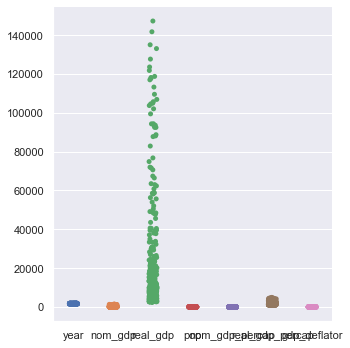

In [25]:
sns.catplot(data=df_l)

In [26]:
df_pre = df.loc[:1699]
df_post = df.loc[1700:]

In [27]:
df_post.reset_index()
df_pre.reset_index()

,year,nom_gdp,real_gdp,pop,nom_gdp_percap,real_gdp_percap,gdp_deflator
0,1270,4.42,3517.78,4.36,1.01,805.92,0.13
1,1271,4.77,3481.22,4.37,1.09,796.30,0.14
2,1272,4.94,3611.89,4.38,1.13,824.89,0.14
3,1273,4.40,3406.87,4.39,1.00,776.85,0.13
4,1274,4.67,3394.21,4.39,1.06,772.75,0.14
...,...,...,...,...,...,...,...
425,1695,66.10,8647.53,5.11,12.94,1692.37,0.76
426,1696,67.69,8281.23,5.12,13.22,1617.92,0.82
427,1697,68.93,8222.19,5.15,13.39,1596.54,0.84
428,1698,73.44,8461.70,5.18,14.18,1634.38,0.87


In [28]:
# Standard deviation of GDP before and after FR - HIST
# 